# Авторы
Студенты группы M3439:

- Тепляков Валерий
- Плешаков Алексей
- Филипчик Андрей

# Source code
Исходный код можно посмотреть [тут](https://github.com/Mervap/OptimizationMethods/tree/master/lab3)

In [4]:
from lab3.simplex import runAllTests

runAllTests()

All tests passed.


# Задание 1

# Вопросы

1. Общая и каноническая форма задачи линейного программирования

Общая форма:
$$
\begin{cases}
  \sum\limits_{j=1}^n c_j x_j \rightarrow max, \\
  \sum a_{ij} x_j \leqslant b_i,~i=\overline{1,m_1}, \\
  \sum a_{ij} x_j \geqslant b_i,~i=\overline{m_1+1,m_2}, \\
  \sum a_{ij} x_j = b_i,~ i=\overline{m_2+1,m}.
\end{cases}
$$

Каноническая форма (только равенство + неотрицательность):
$$
\begin{cases}
  \sum\limits_{j=1}^n c_j x_j \rightarrow max, \\
  \sum a_{ij} x_j = b_i,~ i=\overline{1,m}, \\
  x_j \geqslant 0,~\forall j.
\end{cases}
$$

2. Методы естрественного базиса. Метод искусственного базиса
3. Доказать, что ОДР (область допустимых решений) является выпуклым множеством

Пусть произвольное условие $sum a_{ij} x_j = b_i \equiv (a_i, x) = b$ выполнено в некоторых точках $x_1$ и $x_2$. Возьмем произвольную
точку $x_l \in (x_1, x_2)$. Ее можно представить в виде $x_l = lx_1 + (1-l)x_2, ~l \in (0, 1)$. Тогда, для этой точки

$(a_i, x_l) = (a_i, lx_1 + (1-l)x_2) = l(a_i, x_1) + (1-l)(a_i, x_2) \leqslant lb + (1-l)b = (l+1-l)b = b$

То есть $(a_i, x_l) \leqslant b$ и множество удовлетворяет условию выпуклости


4. Может ли ОДР в задаче линейного программирования состоять из одной единственной точки? Если да, то привести пример
5. Графический метод решения задачи линейного программирования. Используя графический метод, найти решение задачи линейного программирования:
$$f(x)=-3x_1-2x_2 \rightarrow min$$
$$
\begin{cases}
  x_1 + 2x_2 \leqslant 7, \\
  2x_1+x_2 \leqslant 8, \\
  x_2 \leqslant 3, \\
  x_1 \geqslant 0,~x_2 \geqslant 0.
\end{cases}
$$

Построим линии ограничений на осях $x_1Ox_2$. Будем двигать прямую с вектором нормы $(-3, -2)$ в направлении, противоположном вектору нормы (так как ищем минимум, а не максимум). $(3, 2)$ --- решение, как крайняя точка

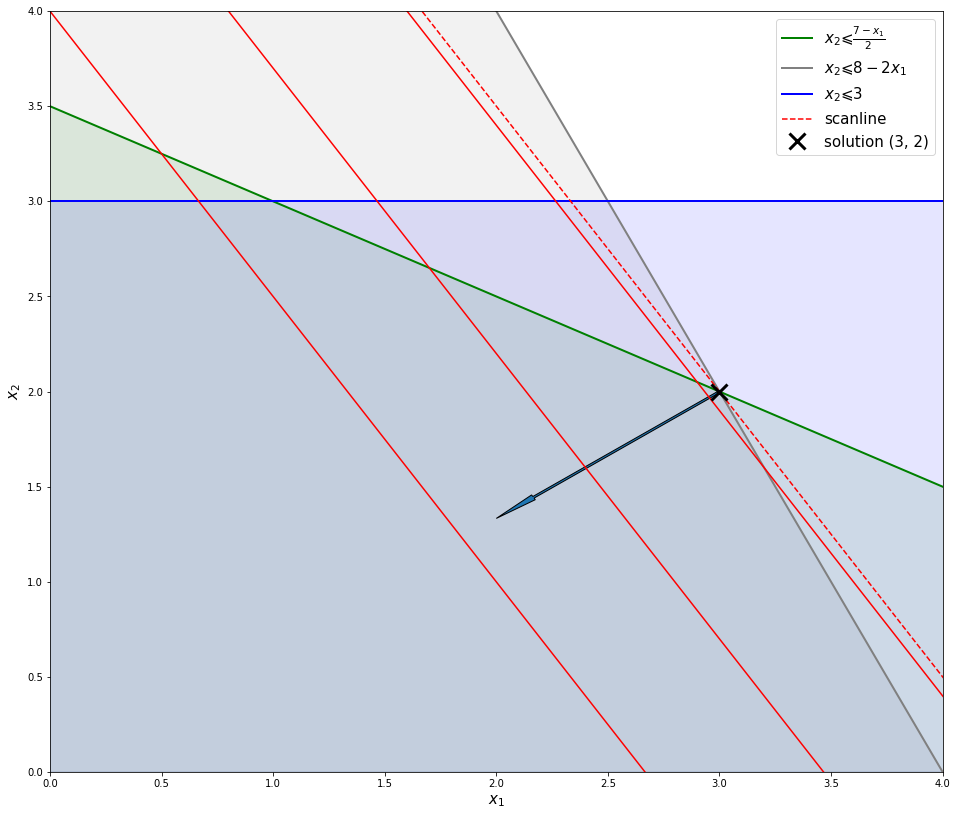

In [2]:
plt.figure(figsize=(16, 14))

xs = np.linspace(-5, 5, 1000)
f1 = (7 - xs) / 2
f2 = 8 - 2 * xs
f3 = [3 for _ in range(len(xs))]
plt.plot(xs, f1, color='g', linewidth=2, label=r'$x_2 \leqslant \frac{7-x_1}{2}$')
plt.fill_between(xs, f1, alpha=0.1, color='g')

plt.plot(xs, f2, color='gray', linewidth=2, label=r'$x_2 \leqslant 8 - 2x_1$')
plt.fill_between(xs, f2, alpha=0.1, color='gray')

plt.plot(xs, f3, color='b', linewidth=2, label=r'$x_2 \leqslant 3$')
plt.fill_between(xs, f3, alpha=0.1, color='b')

for b in np.linspace(4, 6.4, 3):
    plt.plot(xs, list(map(lambda x: -3/2*x + b, xs)), color='r')
plt.plot(xs, list(map(lambda x: -3/2*x + 6.5, xs)), color='r', linestyle='--', label='scanline')
plt.arrow(3, 2, -1, -2 / 3, width=0.01, head_length=0.2, length_includes_head=True)
plt.plot(3, 2, 'x', color='black', ms=16, mew=3, label='solution (3, 2)')

plt.axis([0, 4, 0, 4])
plt.xlabel("$x_1$", fontsize=15)
plt.ylabel("$x_2$", fontsize=15)
plt.legend(fontsize=15)
plt.show()

6. Найти все базисы системы равенств и соответствующие им базисные решения:
$$
\begin{cases}
    x_1+x_2+x_3+x_4 = 1, \\
    x_1-x_2+x_3-x_4 = 1, \\
    x_j \geqslant 0,~j=1,2,3,4.
\end{cases}
$$
Вычтем из сторой строки первую:
$$
\begin{cases}
x_1 + x_2 + x_3 + x_4 = 1,\
-2x_2 - 2x_4 = 1
\end{cases}
$$
Очевидно, что ровно одна из переменных $x_2$, $x_4$ должна являться базисной; тогда вторую базисную переменную можно выбрать как $x_1$, так и $x_4$. Соответственно, все базисы и соответствующие им решения выглядят следующим образом:
  * $x_1, x_2, (1, 0, 0, 0)$
  * $x_1, x_4, (1, 0, 0, 0)$
  * $x_2, x_3, (0, 0, 1, 0)$
  * $x_3, x_4, (0, 0, 1, 0)$

7. В данной системе ограничений выразить базисные переменные указанного базисного допустимого решения

$\overline x=(1,2,0)^T$ через небазисные:
$$
\begin{cases}
    x_1+x_2+2x_3 = 3, \\
    -2x_1+3x_2+x_3 = 4, \\
    x_j \geqslant 0,~j=1,2,3.
\end{cases}
$$
Так как в данном решении $x_3$ = 0, сделаем $x_3$ небазисной переменной. тогда $x_2 = 2 - x_3, x_1 = 3 - 2x_3 - x_2$, и решение действительно вычисляется в $(1, 2, 0)$.

8. Исследовать на оптимальность решение $\overline x=(0,0,1,1)^T$ задачи:
$$f(x)=x_1+x_2-2x_3-3x_4 \rightarrow min$$
$$
\begin{cases}
    2x_1-x_2+x_3 = 1, \\
    -x_1+2x_2+x_4 = 1, \\
    x_j \geqslant 0,~j=1,2,3,4.
\end{cases}
$$
При запуске симплекс-метода на данной системе видно, что решение $\overline x=(0, 0, 1, 1)^T$ является оптимальным.